<a href="https://colab.research.google.com/github/nhatpd/2021-Summer-School/blob/main/End-to-End-ML-Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Get the data:**

UC Irvine Machine Learning Repository: http://archive.ics.uci.edu/ml/datasets.php

Kaggle datasets: https://www.kaggle.com/datasets

Amazon’s AWS datasets: https://registry.opendata.aws/ 

Read data from https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/
https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/regression/

In [1]:
!pip install wget
import wget
from os import path
!pip install libsvm
from libsvm.svmutil import svm_read_problem

from sklearn.feature_extraction import DictVectorizer

def loadData(url, name):
  if not path.exists(name):
    wget.download(url, name)
  y, X = svm_read_problem(name)
  v = DictVectorizer(sparse=False)
  X = v.fit_transform(X)
  return y, X


  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=c7a9ea875d88d5a220e5a0b7c6977d1d5465c7e8e00334acc61d23454dfdca65
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget
     |████████████████████████████████| 170 kB 5.0 MB/s 
  Created wheel for libsvm: filename=libsvm-3.23.0.4-cp37-cp37m-linux_x86_64.whl size=233361 sha256=75a27dd9593585a29ef3cfad182a92b80c135df70daedbbc60ceabc38b4923bf
  Stored in directory: /root/.cache/pip/wheels/cd/e8/1e/bf95cf256e4d3ffc94289ab508c49d48e34c98220af63e3513
Successfully built libsvm


In [13]:
y, X = loadData('https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/regression/pyrim','pyrim')

In [17]:
wget.download('https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/regression/E2006.test.bz2', 'E2006.test.bz2')


'E2006.test.bz2'

In [20]:
!bunzip2 E2006.test.bz2

In [21]:
y, X = svm_read_problem('E2006.test')
v = DictVectorizer(sparse=True)
X = v.fit_transform(X)

In [ ]:
wget.download('http://archive.ics.uci.edu/ml/machine-learning-databases/00494/WECs_DataSet.zip','WECs_DataSet.zip')
!unzip WECs_DataSet.zip

In [ ]:
df = pd.read_csv('WECs_DataSet/Sydney_Data.csv',header=None)

In [41]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/nhatpd/2021-Summer-School/main/housing.csv')
# red_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep = ';')

# **Discover and visualize the data to gain insights**

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

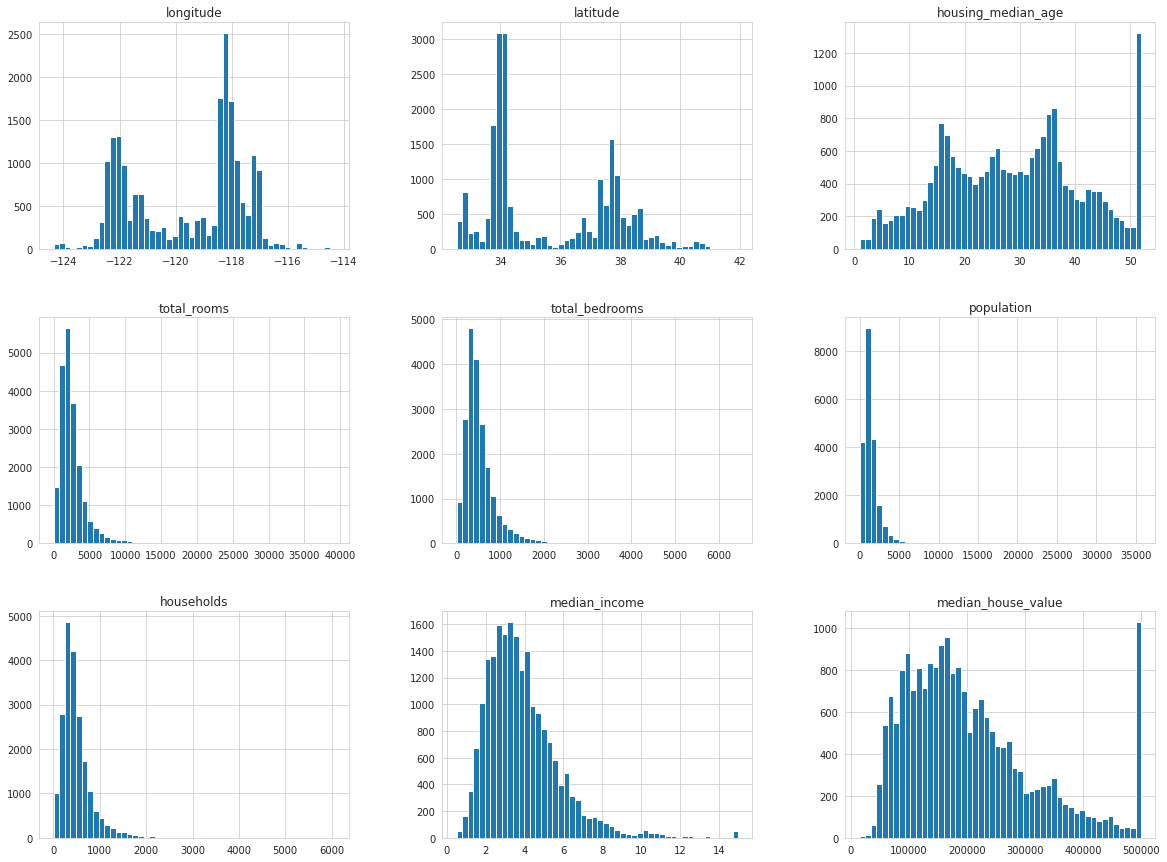

In [ ]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

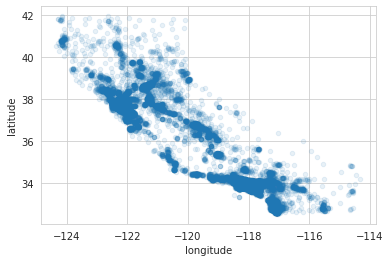

In [ ]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

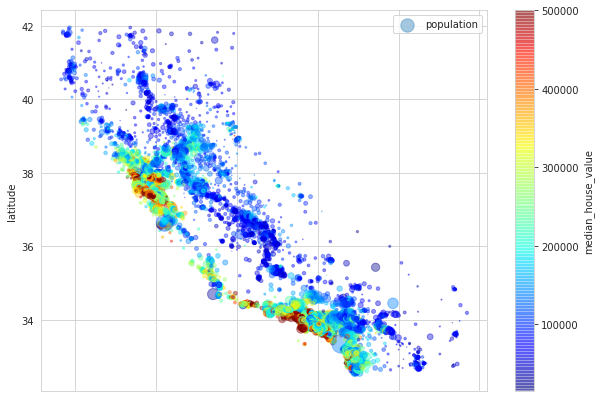

In [ ]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=df["population"]/100, label="population", figsize=(10,7),
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [ ]:
corr_matrix = df.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

# **Prepare the Data for ML Algorithms**

In [ ]:
# df["rooms_per_household"] = df["total_rooms"]/df["households"]
# df["bedrooms_per_room"] = df["total_bedrooms"]/df["total_rooms"]
# df["population_per_household"]=df["population"]/df["households"]

Ceeate a testing set


In [2]:
X = df.drop(['median_house_value'],axis = 1)
y = df['median_house_value']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
X_tr_num = X_train.drop(["ocean_proximity"], axis=1)
X_tr_cat = X_train[["ocean_proximity"]]

Data leaning

In [4]:
# X_train = X_train.dropna(subset=["total_bedrooms"]) 

# X_train = X_train.drop("total_bedrooms", axis=1) 

# median = X_train["total_bedrooms"].median()
# X_train["total_bedrooms"].fillna(median, inplace=True)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

imputer.fit(X_tr_num)
X_num = imputer.transform(X_tr_num)
X_tr_num = pd.DataFrame(X_num, columns=X_tr_num.columns)

Handle Text and Categorical Attributes

In [5]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

X_tr_cat_1hot = cat_encoder.fit_transform(X_tr_cat)
# X_tr_cat_1hot


In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
('imputer', SimpleImputer(strategy="median")),
('std_scaler', StandardScaler()),
])
# X_tr_num = num_pipeline.fit_transform(X_tr_num)

In [7]:
from sklearn.compose import ColumnTransformer

num_attribs = list(X_tr_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
("num", num_pipeline, num_attribs),
("cat", OneHotEncoder(), cat_attribs),
])
X_tr_prepared = full_pipeline.fit_transform(X_train)

# **Select a model and train it**

In [10]:
import numpy as np 
def ERROR(y,y_prediction):
  mse = np.mean(np.square(y-y_prediction))
  rmse = np.sqrt(mse)
  mae = np.mean(np.abs(y - y_prediction))
  mape = np.mean(np.abs((y - y_prediction)/y))
  return {'mse': mse, 'rmse': rmse, 'mae': mae, 'mape': mape}

In [11]:
X_train_sub, X_valid, y_train_sub, y_valid = train_test_split(X_tr_prepared, y_train, test_size=0.2, random_state=42)

Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_sub, y_train_sub)

y_tr_sub_predictions = lin_reg.predict(X_train_sub)
print('training error: ', ERROR(y_train_sub,y_tr_sub_predictions))

y_valid_predictions = lin_reg.predict(X_valid)
print('valid error: ', ERROR(y_valid,y_valid_predictions))

training error:  {'mse': 4638998702.14607, 'rmse': 68110.19528782801, 'mae': 49329.25444425494, 'mape': 0.28573752404020564}
valid error:  {'mse': 4871132962.338827, 'rmse': 69793.50229311342, 'mae': 50991.810872153146, 'mape': 0.28953876938137185}


Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train_sub, y_train_sub)
print('training error: ', ERROR(y_train_sub,tree_reg.predict(X_train_sub)))
print('valid error: ', ERROR(y_valid,tree_reg.predict(X_valid)))

training error:  {'mse': 0.0, 'rmse': 0.0, 'mae': 0.0, 'mape': 0.0}
valid error:  {'mse': 5231818163.4762335, 'rmse': 72331.30832133643, 'mae': 45477.34241598547, 'mape': 0.2443236433398668}


Randon Forest

In [13]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train_sub, y_train_sub)
print('training error: ', ERROR(y_train_sub,forest_reg.predict(X_train_sub)))
print('valid error: ', ERROR(y_valid,forest_reg.predict(X_valid)))

training error:  {'mse': 331679043.5412253, 'rmse': 18212.057641607258, 'mae': 11840.60612461202, 'mape': 0.06622327412934488}
valid error:  {'mse': 2620000187.698324, 'rmse': 51185.937401773976, 'mae': 33265.93988798066, 'mape': 0.18069354662451126}


# **Fine-Tune Your Model**

In [ ]:
param_grid = {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}
for n_est in param_grid['n_estimators']:
  for max_f in param_grid['max_features']:
    model = RandomForestRegressor(n_estimators=n_est,max_features=max_f)
    model.fit(X_train_sub, y_train_sub)
    print('n_estimators:', n_est,'max_features:', max_f,'RMSE:', ERROR(y_valid,model.predict(X_valid))['rmse'])


n_estimators: 3 max_features: 2 RMSE: 64477.50258046824
n_estimators: 3 max_features: 4 RMSE: 59978.141903251104
n_estimators: 3 max_features: 6 RMSE: 58966.55539323971
n_estimators: 3 max_features: 8 RMSE: 57993.5180406863
n_estimators: 10 max_features: 2 RMSE: 55453.22871386269
n_estimators: 10 max_features: 4 RMSE: 53884.15152790473
n_estimators: 10 max_features: 6 RMSE: 52925.585116820905
n_estimators: 10 max_features: 8 RMSE: 53544.212882808155
n_estimators: 30 max_features: 2 RMSE: 53801.85165510358
n_estimators: 30 max_features: 4 RMSE: 51594.32848740238
n_estimators: 30 max_features: 6 RMSE: 51675.54231005465
n_estimators: 30 max_features: 8 RMSE: 51969.736208881994


In [ ]:
model = RandomForestRegressor(n_estimators=n_est,max_features=max_f)
model.fit(X_tr_prepared,y_train)

X_test_prepared = full_pipeline.transform(X_test)

print('testing error: ', ERROR(y_test,model.predict(X_test_prepared)))

testing error:  {'mse': 2417033608.0966277, 'rmse': 49163.336014723696, 'mae': 32317.01715116285, 'mape': 0.18028654510627207}


Cross_validation using KFolfd

In [14]:
from sklearn.model_selection import KFold

nfold = 5
kfolds = KFold(n_splits=nfold)

param_grid = {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}
for n_est in param_grid['n_estimators']:
  for max_f in param_grid['max_features']:
    error = 0
    for train_index, test_index in kfolds.split(X_tr_prepared):
      X_train_folds = X_tr_prepared[train_index]
      y_train_folds = y_train.iloc[train_index]
      X_test_fold = X_tr_prepared[test_index]
      y_test_fold = y_train.iloc[test_index]
      model = RandomForestRegressor(n_estimators=n_est,max_features=max_f)
      model.fit(X_train_folds, y_train_folds)
      error += ERROR(y_test_fold,model.predict(X_test_fold))['rmse']/nfold
    print('n_estimators:', n_est,'max_features:', max_f,'RMSE:', error)

n_estimators: 3 max_features: 2 RMSE: 62883.01885698071
n_estimators: 3 max_features: 4 RMSE: 59925.18637074763
n_estimators: 3 max_features: 6 RMSE: 58720.054209284346
n_estimators: 3 max_features: 8 RMSE: 57291.154129948496
n_estimators: 10 max_features: 2 RMSE: 55131.88682510152
n_estimators: 10 max_features: 4 RMSE: 52433.82375668169
n_estimators: 10 max_features: 6 RMSE: 51686.1791390623
n_estimators: 10 max_features: 8 RMSE: 51505.868155218166
n_estimators: 30 max_features: 2 RMSE: 52409.40733509436
n_estimators: 30 max_features: 4 RMSE: 50304.710950673725
n_estimators: 30 max_features: 6 RMSE: 49567.093813093226
n_estimators: 30 max_features: 8 RMSE: 49706.39265675519


Cross_validation using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(X_tr_prepared, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)

62718.34627699698 {'max_features': 2, 'n_estimators': 3}
55013.08885574974 {'max_features': 2, 'n_estimators': 10}
52368.57995509042 {'max_features': 2, 'n_estimators': 30}
58735.525056087936 {'max_features': 4, 'n_estimators': 3}
52353.967438103056 {'max_features': 4, 'n_estimators': 10}
50145.47953819341 {'max_features': 4, 'n_estimators': 30}
60235.32311805593 {'max_features': 6, 'n_estimators': 3}
51565.86918768846 {'max_features': 6, 'n_estimators': 10}
50012.611479442734 {'max_features': 6, 'n_estimators': 30}
57930.09987233371 {'max_features': 8, 'n_estimators': 3}
51324.84028954488 {'max_features': 8, 'n_estimators': 10}
49649.46210866794 {'max_features': 8, 'n_estimators': 30}


In [ ]:
print(grid_search.best_params_)
print(grid_search.best_estimator_)

{'max_features': 8, 'n_estimators': 30}
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


In [ ]:
print('testing error: ', ERROR(y_test,grid_search.best_estimator_.predict(X_test_prepared)))

testing error:  {'mse': 2444993081.3026485, 'rmse': 49446.87129943257, 'mae': 32066.55259205432, 'mape': 0.17759843986293894}


Practice projects:

1. Predict Risk from Financial Reports
http://www.cs.cmu.edu/~ark/10K/
2. https://www.kaggle.com/c/competitive-data-science-predict-future-sales/data
3. https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

